In [1]:
library(igraph)
library(neat)
library(utils)
library(reshape2)
library(ggplot2)
library(pheatmap)
library(viridis)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: viridisLite


In [2]:
d=read.delim(gzfile("GENIE3.top10_target_ranks.ranked_regulator_target_interactions.with_communities.tsv.gz"),sep="\t",stringsAsFactors=FALSE)
d=subset(d,community %in% as.character(as.roman(1:11)))
head(d)

,regulatoryGene,targetGene,weight,regulator_rank,target_rank,mutual_rank,regulator_community,target_community,community
1,Pp3c17_930.mRNA,Pp3s340_10.mRNA,0.067780515,1,1,1.000000,I,I,I
3,Pp3c2_25760.mRNA,Pp3s340_10.mRNA,0.015763051,58,3,13.190906,I,I,I
4,Pp3c19_10050.mRNA,Pp3s340_10.mRNA,0.009034066,496,7,58.923679,I,I,I
6,Pp3c2_36690.mRNA,Pp3s340_10.mRNA,0.009846669,50,6,17.320508,I,I,I
11,Pp3c17_930.mRNA,Pp3c19_7324.mRNA,0.047101805,2,1,1.414214,I,I,I
13,Pp3c2_25760.mRNA,Pp3c19_7324.mRNA,0.012256680,111,6,25.806976,I,I,I


In [3]:
n=read.delim("GENIE3.top10_target_ranks.communities_PLM.with_node_centralities.csv",sep=";",stringsAsFactors=FALSE)
n=subset(n,community %in% as.character(as.roman(1:11)))
head(n)

geneid,community,degree_centrality,betweenness_centrality,eigenvector_centrality,local_reaching_centrality,centrality_rank
Pp3c27_3080.mRNA,I,109,0,0.00000000,0.9977499,1
Pp3c11_23290.mRNA,I,552,3190,0.05359921,0.9971070,2
Pp3c7_2300.mRNA,I,505,7529,0.02518149,0.9971070,3
Pp3c17_23620.mRNA,I,490,1988,0.05419710,0.9971070,4
Pp3c16_13280.mRNA,I,485,9982,0.05634423,0.9971070,5
Pp3c15_11610.mRNA,I,461,3734,0.04049888,0.9971070,6


In [4]:
G=graph_from_data_frame(d,directed = TRUE,vertices = n)

In [5]:
head(degree(G,mode="out")["Pp3c27_3080.mRNA"])

Pp3c27_3080.mRNA 
             109

In [7]:
n$community=ordered(n$community,levels=as.character(as.roman(1:11)))
table(n$community)


   I   II  III   IV   IX    V   VI  VII VIII    X   XI 
3112 4418 1705 2728 6167 3435 1849 3851 3662 2403 2309 

In [ ]:
com=sapply(levels(n$community),function(i) n[n$community==i, "geneid"])

Notebook originally comprised multiple NEAT analyses and was split to increase readability and reproducibility.

In [81]:
e=read.delim("calpain_cleavage_prediction.cosmoss_V3.3.release.pep.ccd.NERD_classification.tsv",sep="\t",row.names=1)
head(e)

,id,sites_raw,len,tertiary_deaminated_raw,tertiary_oxidized_or_acetylated_raw,secondary_ATE_raw,secondary_peptidase_raw,primary_acetylated_raw,ratio,lratio,⋯,secondary_ATE_rel,secondary_peptidase_rel,primary_acetylated_rel,clust,uncertainty,U1,U2,U3,fate,fate_strict
Pp3c10_10040.mRNA,Pp3c10_10040V3.1,64,452,7,0,0,11,41,0.14159292,-1.954799,⋯,0.00000000,0.024336283,0.09070796,1,7.607153e-05,9.999239e-01,7.607096e-05,5.713912e-10,NERD,NERD
Pp3c10_10090.mRNA,Pp3c10_10090V3.1,13,56,2,0,1,6,4,0.23214286,-1.460402,⋯,0.01785714,0.107142857,0.07142857,2,6.172489e-05,6.172489e-05,9.999383e-01,5.138348e-87,NERD,NERD
Pp3c10_10100.mRNA,Pp3c10_10100V3.1,21,80,1,0,0,6,14,0.26250000,-1.337504,⋯,0.00000000,0.075000000,0.17500000,2,4.176609e-03,4.176609e-03,9.958234e-01,2.752898e-71,NERD,NERD
Pp3c10_10130.mRNA,Pp3c10_10130V3.1,19,499,0,0,0,3,16,0.03807615,-3.268167,⋯,0.00000000,0.006012024,0.03206413,3,2.393614e-02,2.393520e-02,9.345508e-07,9.760639e-01,other,other
Pp3c10_10170.mRNA,Pp3c10_10170V3.1,1,35,0,0,0,1,0,0.02857143,-3.555348,⋯,0.00000000,0.028571429,0.00000000,1,9.508984e-04,9.990491e-01,6.720694e-05,8.836915e-04,NERD,NERD
Pp3c10_10190.mRNA,Pp3c10_10190V3.1,0,52,0,0,0,0,0,0.00000000,-Inf,⋯,0.00000000,0.000000000,0.00000000,3,2.180410e-03,2.180255e-03,1.542735e-07,9.978196e-01,unchanged,unchanged


In [82]:
cn=unique(e$fate_strict)
calpain=sapply(cn,function(f) {
    row.names(e[e$fate_strict==f,])
})
names(calpain)=cn
str(calpain)

List of 3
 $ NERD     : chr [1:12360] "Pp3c10_10040.mRNA" "Pp3c10_10090.mRNA" "Pp3c10_10100.mRNA" "Pp3c10_10170.mRNA" ...
 $ other    : chr [1:19995] "Pp3c10_10130.mRNA" "Pp3c10_10200.mRNA" "Pp3c10_10220.mRNA" "Pp3c10_10270.mRNA" ...
 $ unchanged: chr [1:2485] "Pp3c10_10190.mRNA" "Pp3c10_10414.mRNA" "Pp3c10_11560.mRNA" "Pp3c10_11610.mRNA" ...


In [83]:
test.ca = neat(alist = calpain, blist = com, network = G, nettype = 'directed', nodes = n$geneid, alpha = 0.05) 

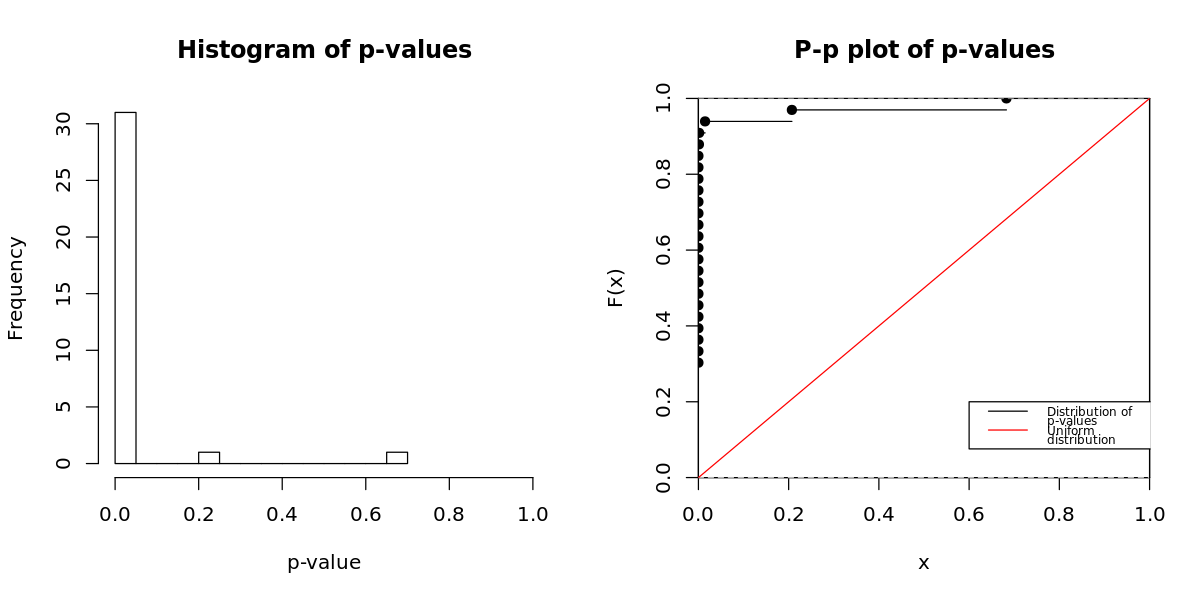

In [84]:
options(repr.plot.width=10, repr.plot.height=5)
plot(test.ca)

In [85]:
test.ca$fdr=p.adjust(test.ca$pvalue,method="fdr")
test.ca$bonferroni=p.adjust(test.ca$pvalue,method="bonferroni")
table(test.ca$conclusion,test.ca$fdr<0.01,test.ca$bonferroni<0.01)

, ,  = FALSE

                 
                  FALSE TRUE
  No enrichment       2    0
  Overenrichment      0    1
  Underenrichment     1    1

, ,  = TRUE

                 
                  FALSE TRUE
  No enrichment       0    0
  Overenrichment      0   13
  Underenrichment     0   15


In [86]:
Test.ca=subset(test.ca[order(-test.ca$nab),], conclusion=="Overenrichment" & fdr<0.01)
table(Test.ca$A,Test.ca$B)

           
            I II III IV IX V VI VII VIII X XI
  NERD      1  1   0  0  0 1  0   0    0 1  1
  other     0  0   1  0  1 0  1   1    1 0  0
  unchanged 0  0   0  1  1 0  1   0    0 0  1

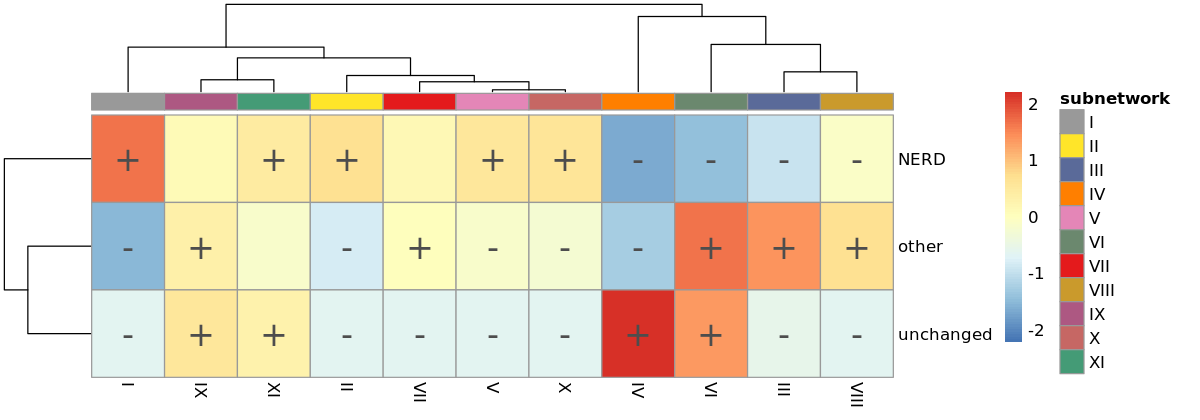

In [87]:
x=test.ca
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("_"," ",X[,1])
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("_"," & ",XX[,1])
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
options(repr.plot.width=10, repr.plot.height=3.5)

pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=20
        )

In [89]:
write.table(test.ca,file="NEAT_subnetwork_enrichment.calpain_cleavage_NERD_pathway.tsv",sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)

In [90]:
x=test.ca
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("_"," ",X[,1])
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("_"," & ",XX[,1])
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=20,
         width=10,
         height=4,
         filename="NEAT_subnetwork_enrichment.calpain_cleavage_NERD_pathway.pdf"
        )